### 1b)
### wrong

In [ ]:
from scipy.integrate import ode
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook
N = 1000
K = 0


def stdmap(t,x):
    x = x.reshape((N,2))
    temp = np.zeros_like(x)
    temp[:,0] = np.mod(x[:,0] + x[:,1],1)
    temp[:,1] = np.mod(x[:,1] + K/(2*np.pi) * np.sin(2*np.pi * temp[:,0]),1)
    return temp.reshape((2*N))

def Int(t0,x0,s):
    r = ode(stdmap).set_integrator('dopri5')
    x0 = x0.reshape(2*N)
    r.set_initial_value( x0, t0)
    t1 = -0.005
    dt = -0.0001
    
    while r.successful() and r.t > t1:
        temp = r.integrate(r.t+dt).reshape((N,2))
        #print(temp[:,0],temp[:,1])
        plt.plot(temp[:,0],temp[:,1],s)

# calculate intitail values

v_minus = np.array([-K/2. - np.sqrt(K**2 + 4 * K)/2. ,1])
v_minus = v_minus/(abs(v_minus)*500.)
x_minus = ((np.random.rand(N,1)*2-1)*v_minus)

v_plus = np.array([-K/2. + np.sqrt(K**2 + 4 * K)/2. ,1])
v_plus = v_plus/(abs(v_plus)*500.)
x_plus = ((np.random.rand(N,1)*2-1)*v_plus)

#integrate
plt.figure()

Int(0,x_minus,'.r')
Int(0,x_plus,'.b')

#plt.plot(x_minus[:,0],x_minus[:,1],'.k')
#plt.plot(x_plus[:,0],x_plus[:,1],'.b')


plt.show()

<IPython.core.display.Javascript object>


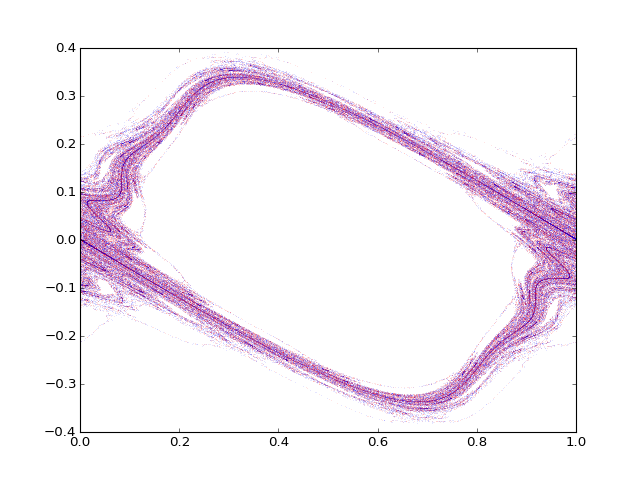

In [18]:
import matplotlib.pyplot as plt
import numpy as np

K = 1
L = 100 # iterations
N = 1000 # starting points


def stdinv(xp,K):
    temp = np.zeros_like(xp)
    temp[:,0] = np.mod(xp[:,0] - xp[:,1] + K/(2 * np.pi) * np.sin(2*np.pi * xp[:,0]),1)
    temp[:,1] = np.mod(xp[:,1] - K/(2 * np.pi) * np.sin(2*np.pi * xp[:,0]) + 0.5,1)-0.5
    return temp

v_minus = np.array([-K/2. - np.sqrt(K**2 + 4 * K)/2. ,1])
v_minus = v_minus/(abs(v_minus)*500.)
x_minus = ((np.random.rand(N,1)*2-1)*v_minus)

v_plus = np.array([-K/2. + np.sqrt(K**2 + 4 * K)/2. ,1])
v_plus = v_plus/(abs(v_plus)*500.)
x_plus = ((np.random.rand(N,1)*2-1)*v_plus)

plt.figure()
for i in range(1,L+1):
    x_minus = stdinv(x_minus,K)
    x_plus = stdinv(x_plus,K)
    plt.plot(x_minus[:,0],x_minus[:,1],',r', alpha=0.1)
    plt.plot(x_plus[:,0],x_plus[:,1],',b', alpha=0.1)
plt.show()

### working

K = 0.0


<IPython.core.display.Javascript object>


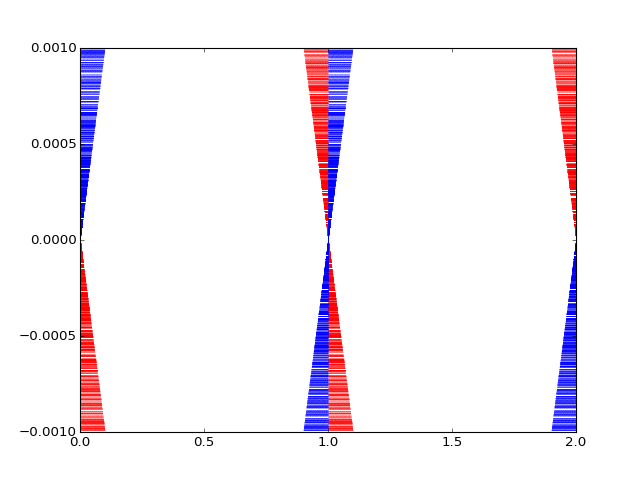

K = 0.5


<IPython.core.display.Javascript object>


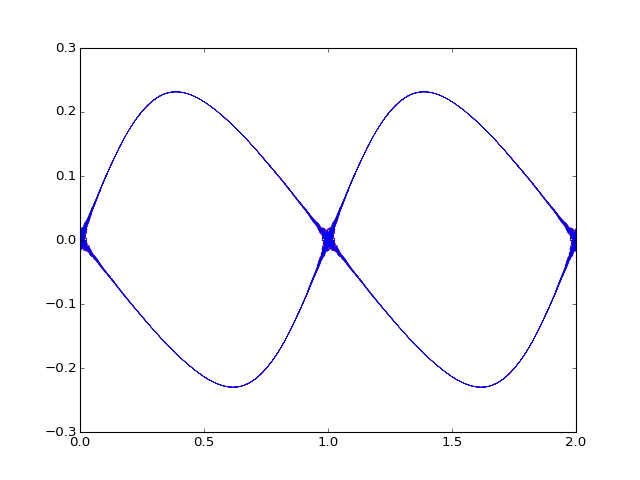

K = 1.0


<IPython.core.display.Javascript object>


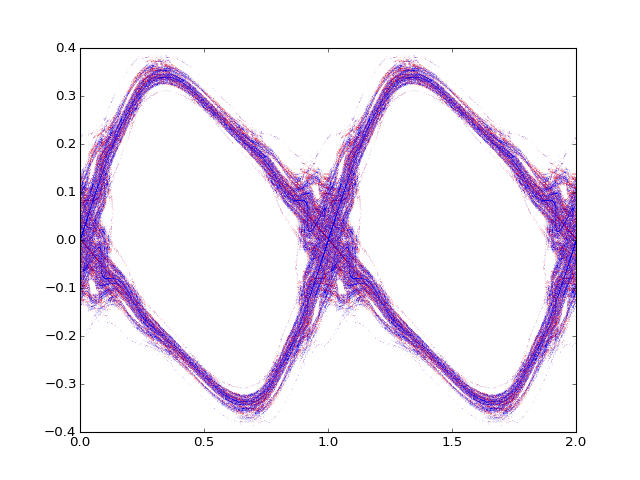

K = 1.5


<IPython.core.display.Javascript object>


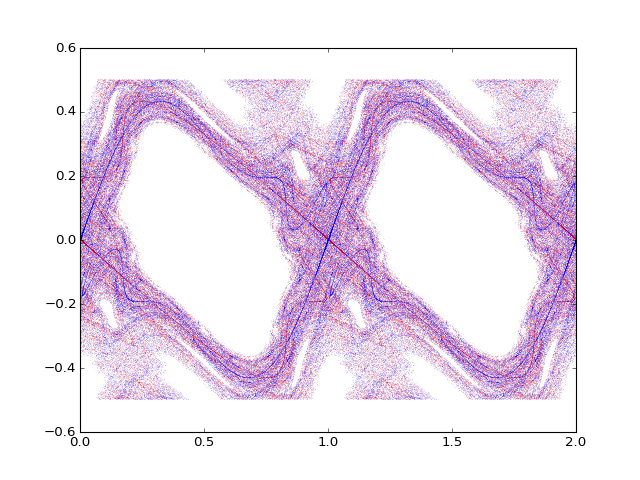

K = 2.0


<IPython.core.display.Javascript object>


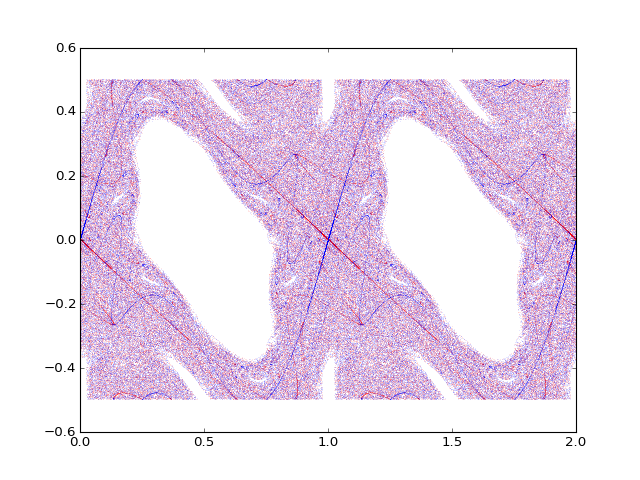

K = 2.5


<IPython.core.display.Javascript object>


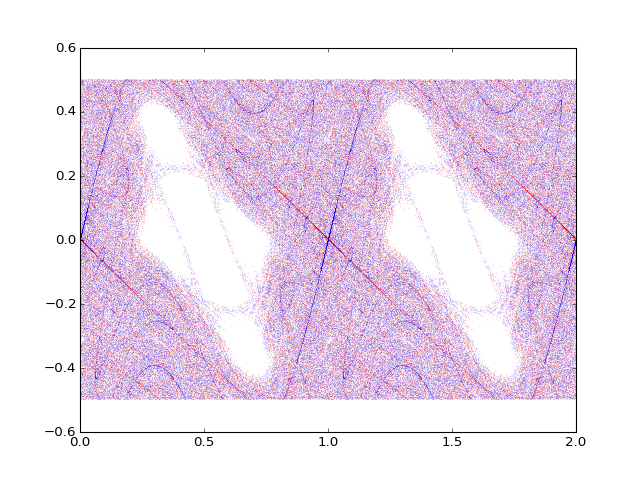

K = 3.0


<IPython.core.display.Javascript object>


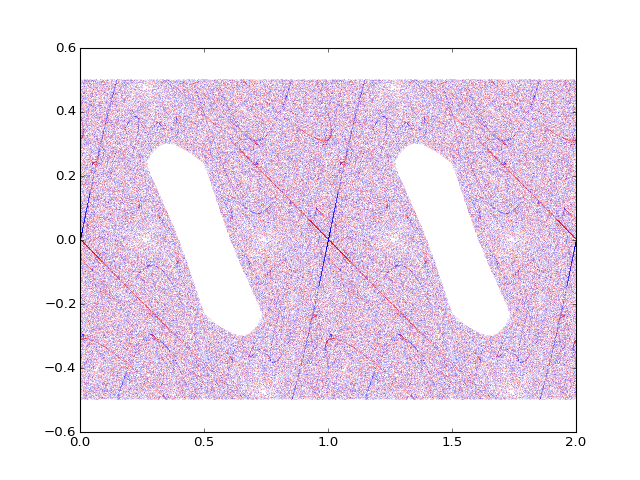

K = 3.5


<IPython.core.display.Javascript object>


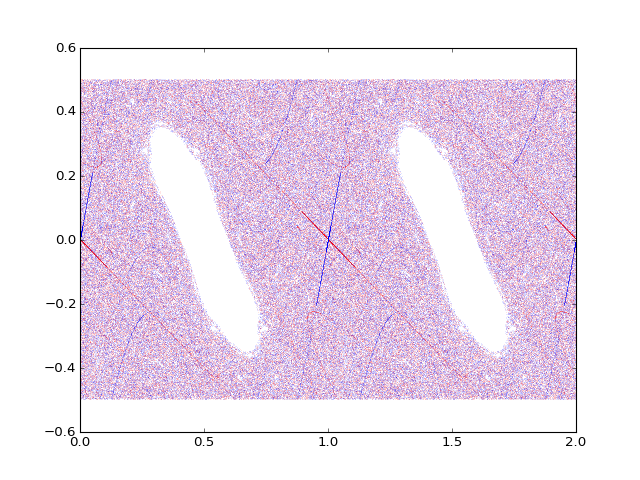

In [3]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

K = 1
ITER = 100
NSTART = 1000
tau = 2 * np.pi
alpha = 0.1

def stdinv(X, P):
    return (np.mod(X - P + K / tau * np.sin(tau * X), 1), 
            np.mod(P - K / tau * np.sin(tau * X) + 0.5, 1) - 0.5)

def stdmap(X, P):
    return (np.mod(X + P, 1), 
            np.mod(P + K / tau * np.sin(tau * (X + P)) + 0.5, 1) - 0.5)



for K in (k / 2. for k in range(8)):
    print('K = ' + str(K))
    plt.figure()
    
    P = (np.random.rand(NSTART, 1) * 2 - 1) / 1000
    X = -(K / 2 + np.sqrt(K**2 + 4 * K) / 2) * P
    for i in range(ITER):
        X, P = stdinv(X, P)
        plt.plot(X, P, ',r', alpha = alpha)
        plt.plot(X + 1, P, ',r', alpha = alpha)

    P = (np.random.rand(NSTART, 1) * 2 - 1) / 1000
    X = -(K / 2 - np.sqrt(K**2 + 4 * K) / 2) * P
    for i in range(ITER):
        X, P = stdmap(X, P)
        plt.plot(X, P, ',b', alpha = alpha)
        plt.plot(X + 1, P, ',b', alpha = alpha)

    plt.show()

<IPython.core.display.Javascript object>


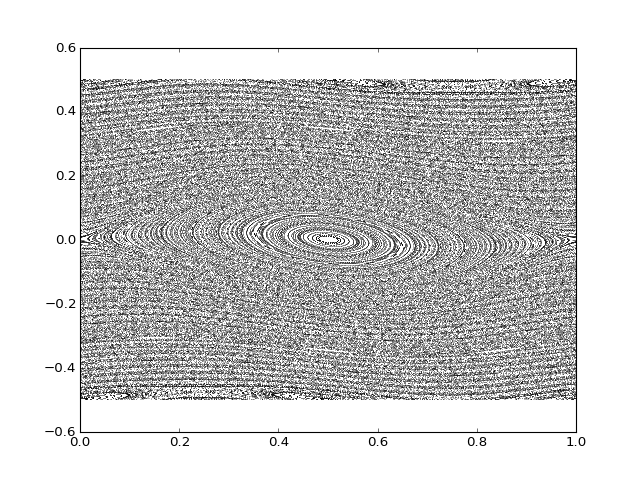

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

Nmax = 100 #iterations
L = 50 # plotting grid
M = 1000 #starting points
K = 0.3

def std_map(xp, K):
    return np.array([np.mod(xp[:,0]+xp[:,1],1), 
                     np.mod(xp[:,1]+K*np.sin(2*np.pi*(xp[:,0]+xp[:,1]))/(2*np.pi)+0.5,1) -0.5]).transpose()

def stdinv(xp,K):
    temp = np.zeros_like(xp)
    temp[:,0] = np.mod(xp[:,0] - xp[:,1] + K/(2 * np.pi) * np.sin(2*np.pi * xp[:,0]),1)
    temp[:,1] = np.mod(xp[:,1] - K/(2 * np.pi) * np.sin(2*np.pi * xp[:,0])+0.5,1)-0.5
    return temp

x,p = np.meshgrid(np.linspace(0,1,L),np.linspace(-0.5,0.5,L))
grid = np.zeros((L,L,2))
grid[:,:,0] = x
grid[:,:,1] = p
xp = grid.reshape(L*L,2)


# starting points near (0,0)
v_minus = np.array([-K/2. - np.sqrt(K**2 + 4 * K)/2. ,1])
v_minus = v_minus/(abs(v_minus)*500.)
x_minus = ((np.random.rand(M,1)*2-1)*v_minus)

v_plus = np.array([-K/2. + np.sqrt(K**2 + 4 * K)/2. ,1])
v_plus = v_plus/(abs(v_plus)*500.)
x_plus = ((np.random.rand(M,1)*2-1)*v_plus)

plt.figure()
#plt.ylim([-0.5,0.5])
for n in range(1,Nmax+1):
    plt.plot(xp[:,0],xp[:,1],',k',alpha=0.3)
    xp = std_map(xp,K)
plt.show()